In [10]:
from dtk.tools.serialization import dtkFileTools as dft
import json
import pandas as pd
import numpy as np
import os

from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

# Open sim_map
sim_map = pd.read_csv("C:/Users/jsuresh/Dropbox (IDM)/Malaria Team Folder/projects/zambia_gridded_sims/kariba_gridded_sims/calibs/luumbo/burnin_sim_map.csv")

times = np.array([0.0, 30.417, 60.833, 91.25, 121.667, 152.083, 182.5, 212.917, 243.333, 273.75, 304.167, 334.583, 365])
new_funest_spline = np.array([0.13333333, 0.33333333, 1., 0.66666667, 0.66666667, 0.66666667, 0.33333333, 0.33333333, 0.2, 0.13333333, 0.06666667, 0.06666667,0.13333333])

# arab_spline = np.array([0.8, 1.0, 1.0, 0.9, 0.1, 0.01, 0.01, 0.01, 0.02, 0.05, 0.1, 0.2, 0.8])
# arab_spline = np.array([0.6, 0.8, 1.0, 0.9, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.05, 0.6])
arab_spline = np.array([0.6, 0.8, 1.0, 0.9, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.05, 0.6])


funest_capacity_dist = []
arab_capacity_dist = []
for i in range(len(times)):
    funest_capacity_dist.append({"key": times[i],
                             "value": new_funest_spline[i]}) 
    arab_capacity_dist.append({"key": times[i],
                             "value": arab_spline[i]}) 

# Loop over paths in sim_map and change spline:
for fp in sim_map["path"]:
    for j in [0,1]:
        state_fp = os.path.join(fp,"output/state-19710-00{}.dtk".format(j))
        dtk_file = dft.read(state_fp)

        for index, node in enumerate(dtk_file.nodes):
#             print('Processing node {0}(suid={1})'.format(index, node.suid.id))
            for d in node.m_larval_habitats:
                habitats = d.value
                species = d.key

                for habitat in habitats:
                    if habitat['__class__'] == 'LinearSplineHabitat':
                        if species == "funestus":
                            habitat.capacity_distribution = funest_capacity_dist
                        elif species == "arabiensis":
                            habitat.capacity_distribution = arab_capacity_dist

            dtk_file.nodes[index] = node

        print("Writing '{0}'".format(state_fp))
        dft.write(dtk_file, state_fp)


Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\d15\e4d\243\d15e4d24-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\d15\e4d\243\d15e4d24-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\082\743\563\08274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\082\743\563\08274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\33c\245\2a3\33c2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\33c\245\2a3\33c2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\25c\245\2a3\25c2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\25c\245\2a3\25c2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\892\743\563\89274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\892\743\563\89274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4ed\4e1\7b3\4ed4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4ed\4e1\7b3\4ed4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\f41\e67\b03\f41e67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\f41\e67\b03\f41e67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\9a8\167\aa3\9a8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\9a8\167\aa3\9a8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\e5c\5b2\d63\e5c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\e5c\5b2\d63\e5c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\72b\dce\143\72bdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\72b\dce\143\72bdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\165\c8f\003\165c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\165\c8f\003\165c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\775\c8f\003\775c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\775\c8f\003\775c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\6ab\dce\143\6abdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\6ab\dce\143\6abdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\0e5\c8f\003\0e5c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\0e5\c8f\003\0e5c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\6eb\dce\143\6ebdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\6eb\dce\143\6ebdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\f32\643\563\f3264356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\f32\643\563\f3264356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\96c\145\2a3\96c1452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\96c\145\2a3\96c1452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\932\743\563\93274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\932\743\563\93274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\42d\4e1\7b3\42d4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\42d\4e1\7b3\42d4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\8a8\167\aa3\8a8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\8a8\167\aa3\8a8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\63f\bde\813\63fbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\63f\bde\813\63fbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3bc\6b2\d63\3bc6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3bc\6b2\d63\3bc6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\68c\5b2\d63\68c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\68c\5b2\d63\68c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\088\267\aa3\088267aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\088\267\aa3\088267aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\595\c8f\003\595c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\595\c8f\003\595c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\025\c8f\003\025c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\025\c8f\003\025c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4b3\5ce\1a3\4b35ce1a-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4b3\5ce\1a3\4b35ce1a-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3ef\cde\813\3efcde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3ef\cde\813\3efcde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\972\743\563\97274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\972\743\563\97274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\7df\bde\813\7dfbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\7df\bde\813\7dfbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\ab8\167\aa3\ab8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\ab8\167\aa3\ab8167aa-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\7cc\5b2\d63\7cc5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\7cc\5b2\d63\7cc5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\fa1\e67\b03\fa1e67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\fa1\e67\b03\fa1e67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\dac\5b2\d63\dac5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\dac\5b2\d63\dac5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4bc\6b2\d63\4bc6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\4bc\6b2\d63\4bc6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\705\c8f\003\705c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\705\c8f\003\705c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\162\743\563\16274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\162\743\563\16274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3fc\245\2a3\3fc2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3fc\245\2a3\3fc2452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\b4c\145\2a3\b4c1452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\b4c\145\2a3\b4c1452a-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\84f\bde\813\84fbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\84f\bde\813\84fbde81-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\61d\4e1\7b3\61d4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\61d\4e1\7b3\61d4e17b-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\b12\743\563\b1274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\b12\743\563\b1274356-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\18c\6b2\d63\18c6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\18c\6b2\d63\18c6b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\211\f67\b03\211f67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\211\f67\b03\211f67b0-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\a8c\5b2\d63\a8c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\a8c\5b2\d63\a8c5b2d6-3e52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3e5\c8f\003\3e5c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\3e5\c8f\003\3e5c8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\48b\dce\143\48bdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\48b\dce\143\48bdce14-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\e75\b8f\003\e75b8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-000.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsuresh\output\luumbo_burnins_20190329_161546\e75\b8f\003\e75b8f00-3f52-e911-a2c0-c4346bcb1554\output/state-19710-001.dtk'
Writing '\\internal.idm.ctr\IDM\Home\jsu

In [33]:
len(old_habs)-1

13

In [34]:
dft.read(fp)

PermissionError: [Errno 13] Permission denied: '\\\\internal.idm.ctr\\IDM\\Home\\jsuresh\\output\\luumbo_burnins_20190329_161546\\d15\\e4d\\243\\d15e4d24-3e52-e911-a2c0-c4346bcb1554'

In [18]:
fp2 = fp + "\output\\state-19710-000.dtk"

In [19]:
dft.read(fp2)

In [8]:
times = np.array([0.0, 30.417, 60.833, 91.25, 121.667, 152.083, 182.5, 212.917, 243.333, 273.75, 304.167, 334.583, 365])

funest_spline_dict = {}
funest_spline_dict[1] = np.array([0.05, 0.2, 1, 0.667, 0.667, 0.667, 0.333, 0.333, 0.2, 0.2, 0.133, 0.05, 0.05]) 
funest_spline_dict[2] = np.array([0.05, 0.2, 1, 0.667, 0.667, 0.667, 0.333, 0.333, 0.2, 0.133, 0.133, 0.05, 0.05]) 
funest_spline_dict[3] = np.array([0.05, 0.333, 1, 0.667, 0.667, 0.667, 0.333, 0.333, 0.2, 0.133, 0.133, 0.05, 0.05]) 
funest_spline_dict[4] = np.array([0.1, 0.333, 1, 0.667, 0.667, 0.667, 0.333, 0.333, 0.2, 0.133, 0.133, 0.05, 0.1])
funest_spline_dict[5] = np.array([0.]*13)
funest_spline_dict[6] = np.array([0.1, 0.333, 1, 1, 0.8, 0.7, 0.5, 0.333, 0.2, 0.133, 0.133, 0.05, 0.1])
funest_spline_dict[7] = np.array([0.05, 0.333, 1, 1, 0.8, 0.7, 0.5, 0.333, 0.2, 0.133, 0.133, 0.05, 0.05])
funest_spline_dict[8] = np.array([0.1, 0.333, 1, 1, 1, 1, 0.8, 0.7, 0.5, 0.3, 0.2, 0.05, 0.1])
fp = "//internal.idm.ctr/IDM/home/jsuresh/input/luumbo_funestus"

for v in [7,8]:
    funest_capacity_dist = []
    for i in range(len(times)):
        funest_capacity_dist.append({"key": times[i],
                                 "value": funest_spline_dict[v][i]}) 

    
    for j in [0,1]:
        state_fp = os.path.join(fp,"v{}-00{}.dtk".format(v,j))
        dtk_file = dft.read(state_fp)

        for index, node in enumerate(dtk_file.nodes):
            for d in node.m_larval_habitats:
                habitats = d.value
                species = d.key

                for habitat in habitats:
                    if habitat['__class__'] == 'LinearSplineHabitat':
                        if species == "funestus":
                            habitat.capacity_distribution = funest_capacity_dist
                            
            dtk_file.nodes[index] = node

        print("Writing '{0}'".format(state_fp))
        dft.write(dtk_file, state_fp)


Writing '//internal.idm.ctr/IDM/home/jsuresh/input/luumbo_funestus\v7-000.dtk'
Writing '//internal.idm.ctr/IDM/home/jsuresh/input/luumbo_funestus\v7-001.dtk'
Writing '//internal.idm.ctr/IDM/home/jsuresh/input/luumbo_funestus\v8-000.dtk'
Writing '//internal.idm.ctr/IDM/home/jsuresh/input/luumbo_funestus\v8-001.dtk'


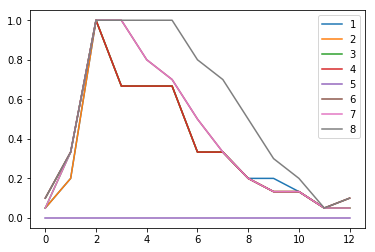

In [11]:
for k in range(1,9):
    plt.plot(funest_spline_dict[k],label=k)
plt.legend()